# Введение

## Цели проекта:

- Научиться строить точечные графики (scatter plots) в Seaborn и настраивать ключевые параметры (цвет, размер, форма, прозрачность).

- Понять, как визуализировать взаимосвязь между двумя количественными переменными, включая разделение по категориям.

- Использовать датасет о результатах экзаменов, чтобы исследовать связи между предметами и влияние внешних факторов (например, подготовки).

- Научиться определять возможные кластеры, выбросы и нелинейные зависимости на scatter plot.

## Описание данных
Датасет содержит информацию об учащихся и их результатах по трём школьным предметам: математике, чтению и письму. Также представлены демографические и социальные характеристики учеников.

| Колонка                       | Описание                                       |
| ----------------------------- | ---------------------------------------------- |
| `gender`                      | Пол учащегося (`female`, `male`)               |
| `race/ethnicity`              | Этническая принадлежность (группы A–E)         |
| `parental level of education` | Уровень образования родителей                  |
| `lunch`                       | Тип школьного обеда (стандартный или льготный) |
| `test preparation course`     | Проходил ли учащийся подготовительный курс     |
| `math score`                  | Оценка по математике (0–100)                   |
| `reading score`               | Оценка по чтению (0–100)                       |
| `writing score`               | Оценка по письму (0–100)                       |


## План работы над проектом
1. Подготовка окружения
- Импорт необходимых библиотек: pandas, seaborn, matplotlib.pyplot

- Загрузка датасета и базовый обзор: просмотр первых строк (head()), информация о структуре и типах данных (info()), проверка на пропущенные значения

2. Анализ и визуализация с помощью Scatter Plot
- Простые точечные графики
Визуализация зависимости между двумя количественными переменными
Использование базовых параметров seaborn.scatterplot

- Группировка и расширенные визуализации
Добавление категориальных признаков. Использование параметров hue, style, size для построения информативных графиков. Применение lmplot для добавления трендовых линий

- Оформление и кастомизация графиков
Настройка размеров, прозрачности (alpha), палитры. Размещение нескольких графиков рядом с помощью FacetGrid или plt.subplots

3. Итоги проекта
- Краткое описание выявленных зависимостей

- Личный опыт: scatter plots и их применении



# Подготовка окружения

## Импорт необходимых библиотек

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка датасета и базовый обзор

In [ ]:
df = pd.read_csv('StudentsPerformance.csv')

In [19]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Анализ и визуализация с помощью Scatter Plot

## Простые точечные графики
Начнём с построения базовых scatter plot, чтобы изучить взаимосвязь между оценками по разным предметам.

Рассмотрим зависимость между оценками по математике и письму:

- `x = df['math score']`, передаёт данные для построения по оси x
- `y = df['writing score']`, передаёт данные для построения по оси y

<Axes: xlabel='math score', ylabel='writing score'>

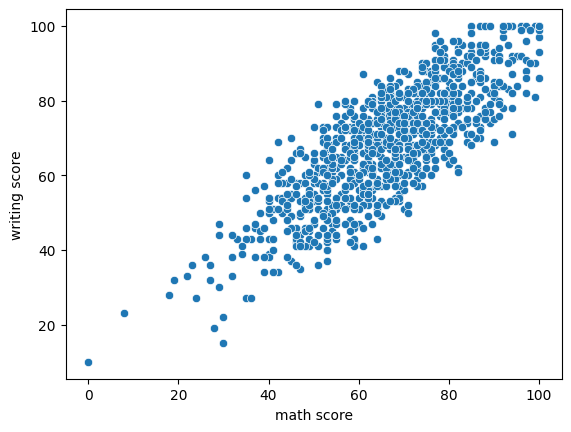

In [22]:
sns.scatterplot(x = df['math score'], y = df['writing score'])

Чтобы не указывать датафрейм вручную для каждой переменной, можно использовать параметр `data=df`

<Axes: xlabel='math score', ylabel='reading score'>

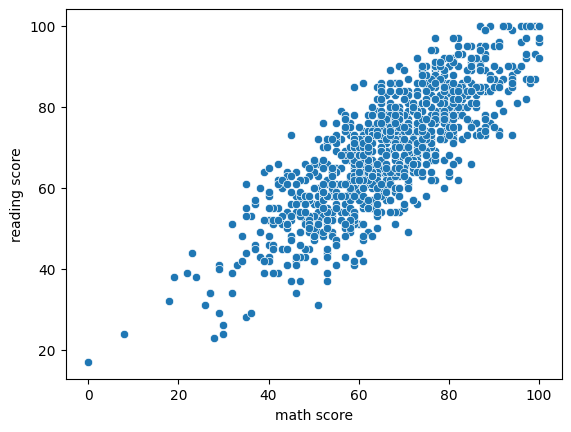

In [23]:
sns.scatterplot(data = df, x = 'math score', y = 'reading score')

Добавим ещё один график — оценка по письму vs оценка по чтению

<Axes: xlabel='writing score', ylabel='reading score'>

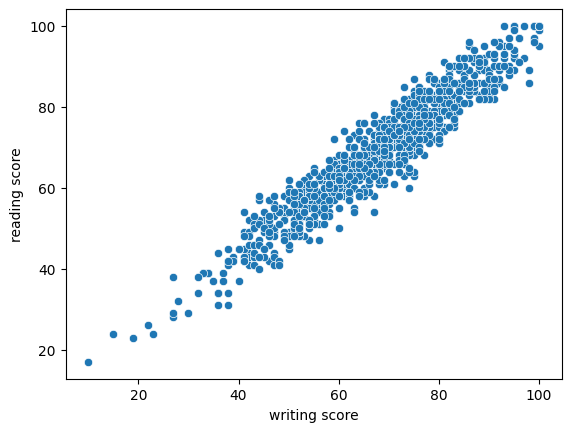

In [24]:
sns.scatterplot(data = df, x = 'writing score', y = 'reading score')

Чтобы показать линию регресии, можно использовать `regplot`

<Axes: xlabel='math score', ylabel='reading score'>

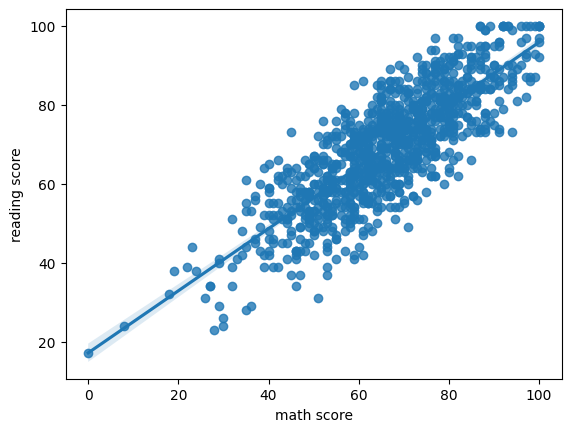

In [25]:
sns.regplot(data = df, x = 'math score', y = 'reading score')

Наблюдения:

- Если у ученика высокая оценка по одному предмету, велика вероятность, что и по другим предметам он показал высокий результат.

- Особенно сильная корреляция наблюдается между оценками по чтению и письму: большинство точек располагаются вдоль линии, близкой к диагонали, что указывает на практически равные значения.

- Зависимость между математикой и письмом также положительная, но чуть менее плотная.



## Группировка и расширенные визуализации

Построим графики для всех пар предметов, используя параметр `hue='gender'`

<Axes: xlabel='math score', ylabel='reading score'>

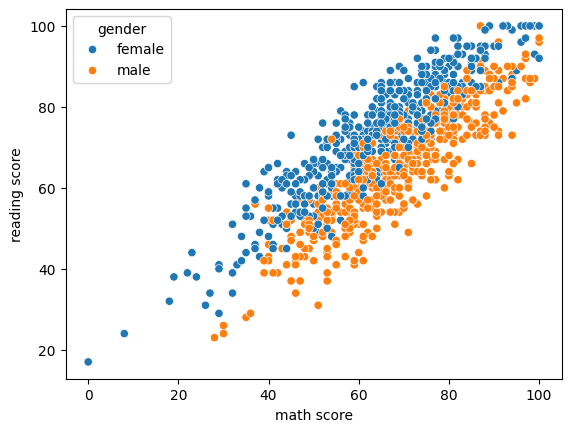

In [26]:
sns.scatterplot(data = df, x = 'math score', y = 'reading score', hue = 'gender')

<Axes: xlabel='math score', ylabel='writing score'>

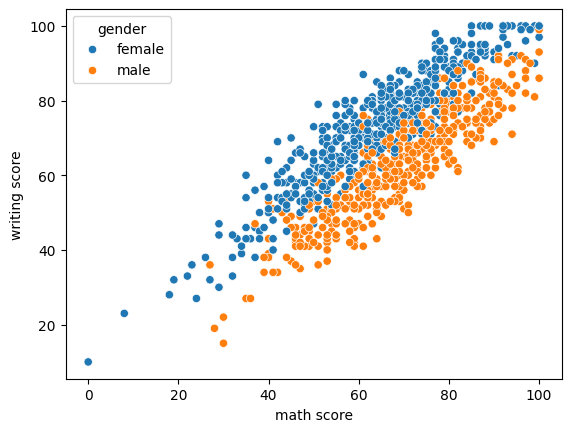

In [27]:
sns.scatterplot(data = df, x = 'math score', y = 'writing score', hue = 'gender')

<Axes: xlabel='writing score', ylabel='reading score'>

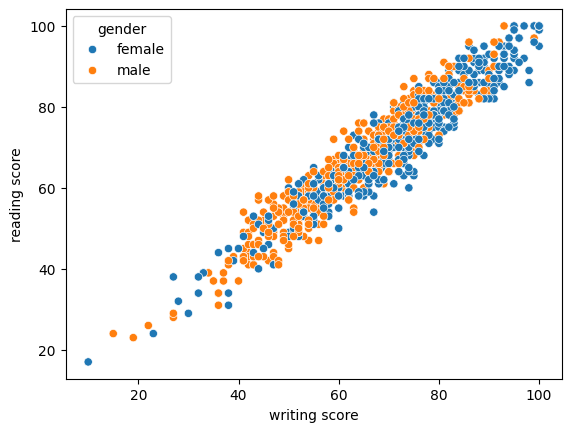

In [28]:
sns.scatterplot(data = df, x = 'writing score', y = 'reading score', hue = 'gender')

Теперь добавим линии регрессии для каждой группы пола с помощью `sns.lmplot`

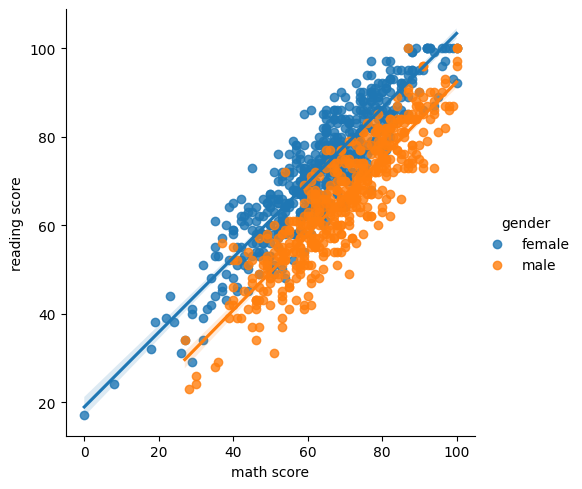

In [29]:
sns.lmplot(x = 'math score', y = 'reading score', hue = 'gender', data = df)


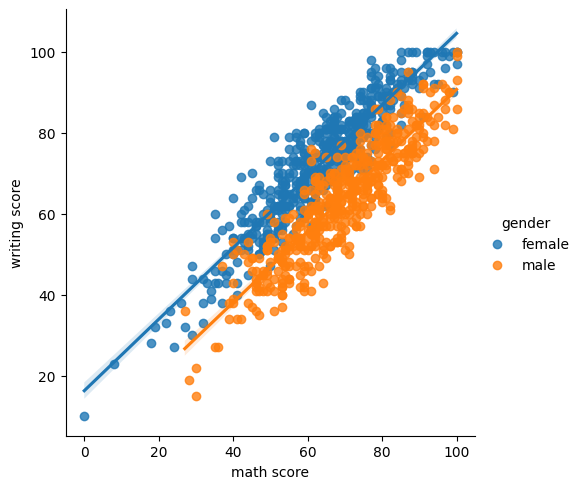

In [30]:
sns.lmplot(data = df, x = 'math score', y = 'writing score', hue = 'gender')

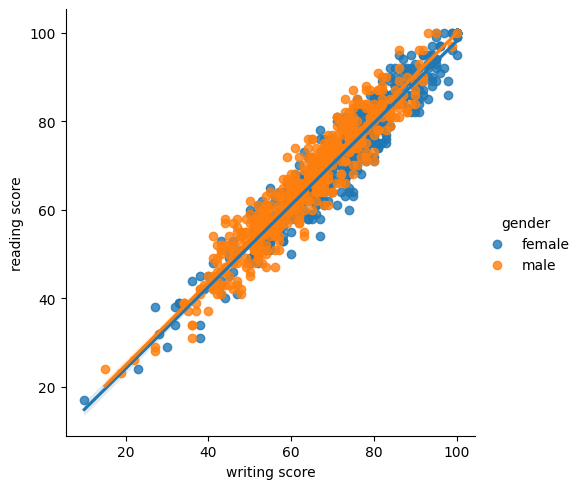

In [31]:
sns.lmplot(data = df, x = 'writing score', y = 'reading score', hue = 'gender')

Наблюдения:

- У девочек и мальчиков схожее распределение по чтению и письму. Линии регрессии почти совпадают.

- Девочки в среднем немного лучше справляются с чтением и письмом, чем с математикой. Линия регрессии для девочек по математике чуть положе, чем для мальчиков.

Проверим, связаны ли оценки с типом школьного питания. Для этого используем параметр `hue='lunch'`

<Axes: xlabel='math score', ylabel='writing score'>

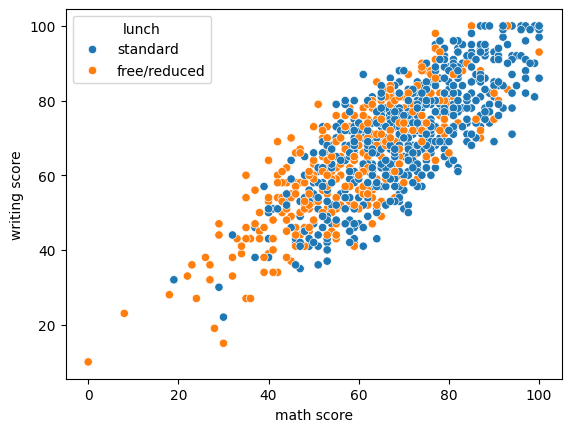

In [32]:
sns.scatterplot(data = df, x = 'math score', y = 'writing score', hue = 'lunch')

<Axes: xlabel='math score', ylabel='reading score'>

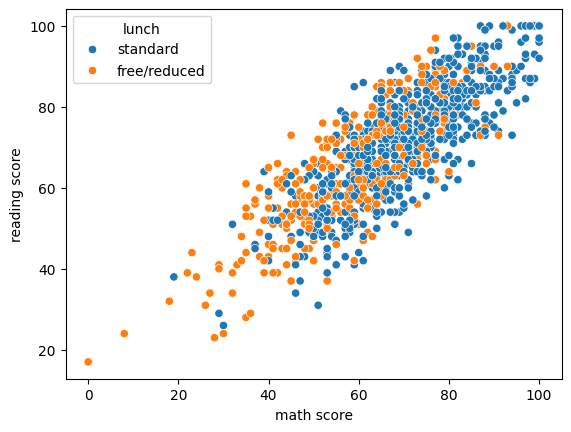

In [33]:
sns.scatterplot(data = df, x = 'math score', y = 'reading score', hue = 'lunch')

<Axes: xlabel='reading score', ylabel='writing score'>

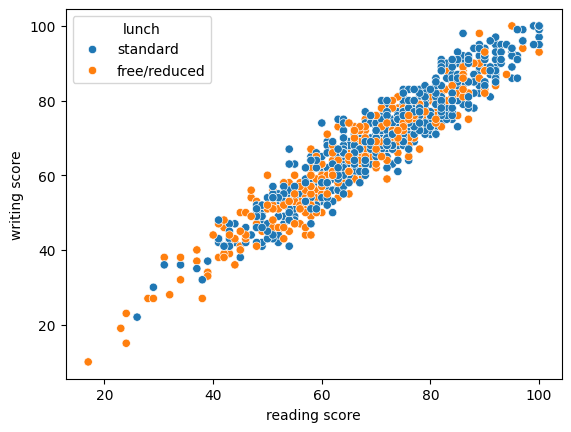

In [34]:
sns.scatterplot(data = df, x = 'reading score', y = 'writing score', hue = 'lunch')

Наблюдения:
- Большинство учеников с высокими баллами (80+) получают стандартный ланч.

- Среди учащихся с низкими баллами (до 40) доминируют те, кто получает льготный обед.

- В диапазоне средних оценок (40–80) встречаются оба типа ланча, но у группы с льготным ланчем средний уровень всё равно ниже.

Узнаем, помог ли учащимся подготовительный курс. Снова меняем параметр `hue = 'test preparation course'`

<Axes: xlabel='math score', ylabel='writing score'>

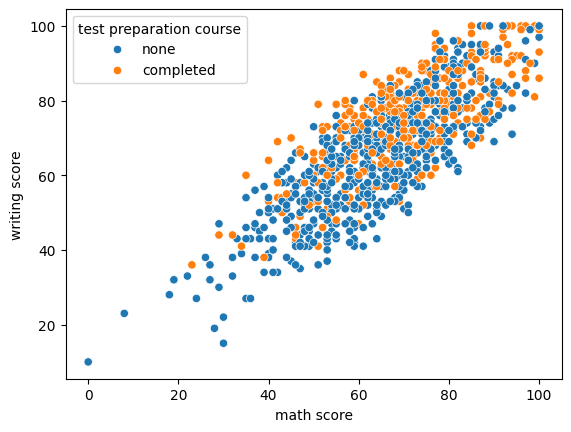

In [35]:
sns.scatterplot(data=df, x = 'math score', y = 'writing score', hue = 'test preparation course')

<Axes: xlabel='math score', ylabel='reading score'>

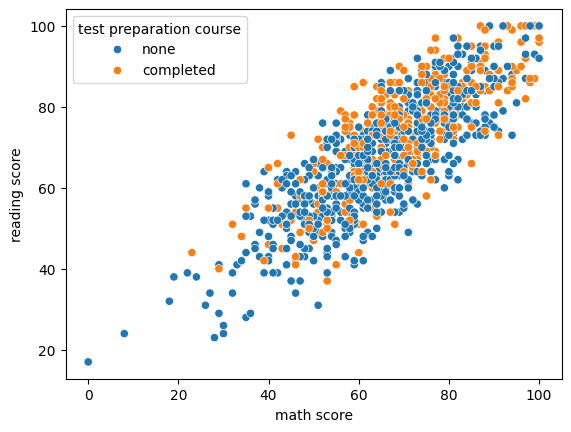

In [36]:
sns.scatterplot(data=df, x = 'math score', y = 'reading score', hue = 'test preparation course')

<Axes: xlabel='reading score', ylabel='writing score'>

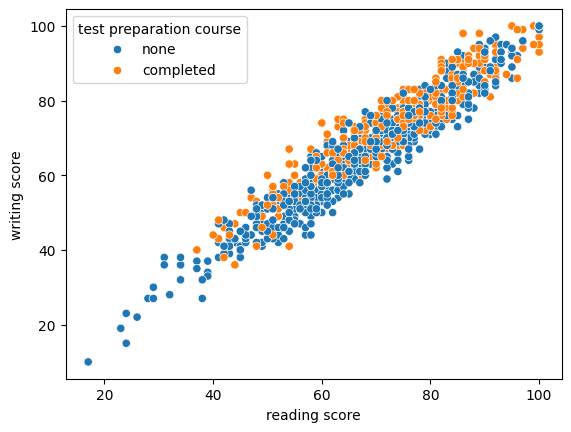

In [37]:
sns.scatterplot(data=df, x = 'reading score', y = 'writing score', hue = 'test preparation course')

Наблюдение:
- Прохождение подготовительного курса заметно повышает оценки учащихся — особенно по чтению и письму
- Ни один учащийся, получивший низкую оценку, не прошёл подготовительный курс

Узнаем, влияет ли уровень образования родителей на успехи детей на экзамене
Для этого вновь воспользуемся `lmplot`

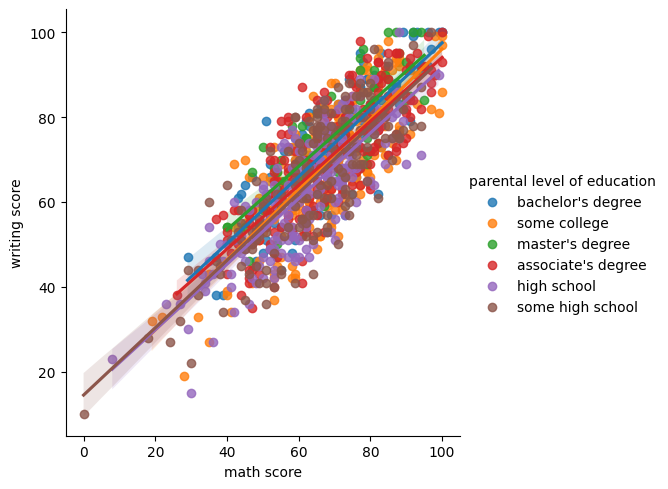

In [38]:
sns.lmplot(data=df, x='math score', y='writing score', hue='parental level of education')

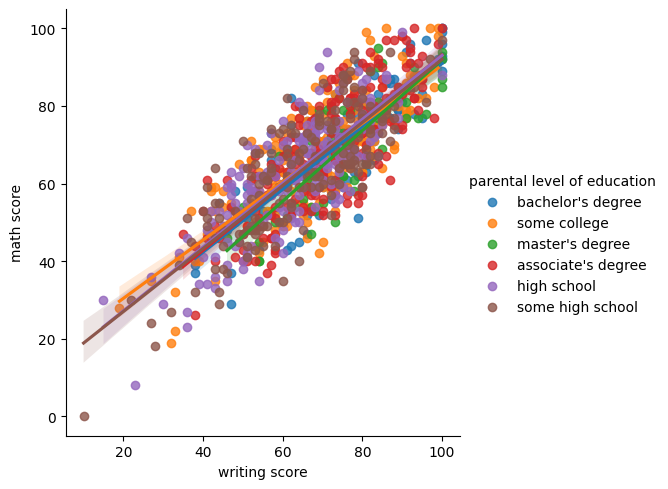

In [39]:
sns.lmplot(data=df, x='writing score', y= 'math score', hue='parental level of education')

Чтобы лучше увидеть разницу воспользуемся параметром `col='parental level of education'` который создаст отдельный график для каждой категории из parental level of education. Также покажем на  графике вид ланча у учащегося при помощи `hue='lunch'`.

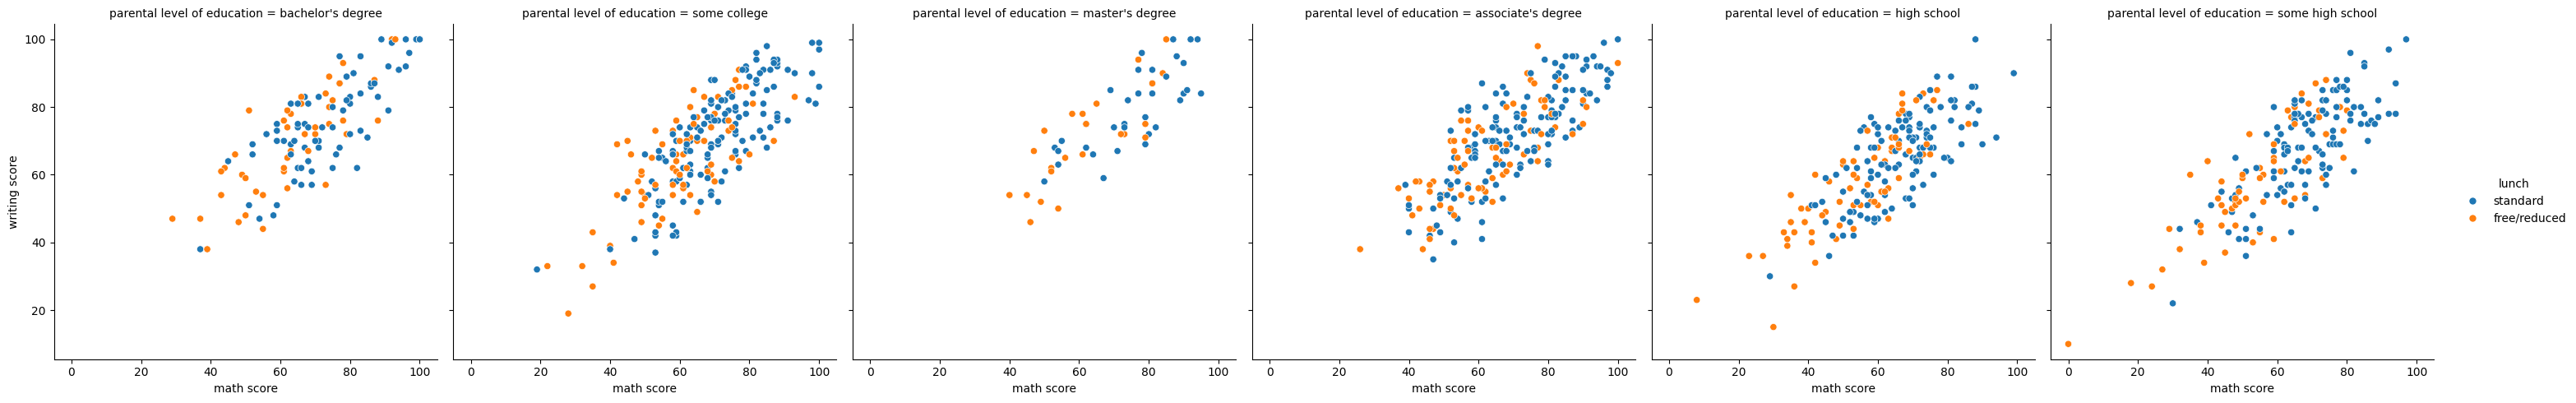

In [40]:
sns.relplot(data=df, x='math score', y='writing score', col='parental level of education', hue='lunch' )

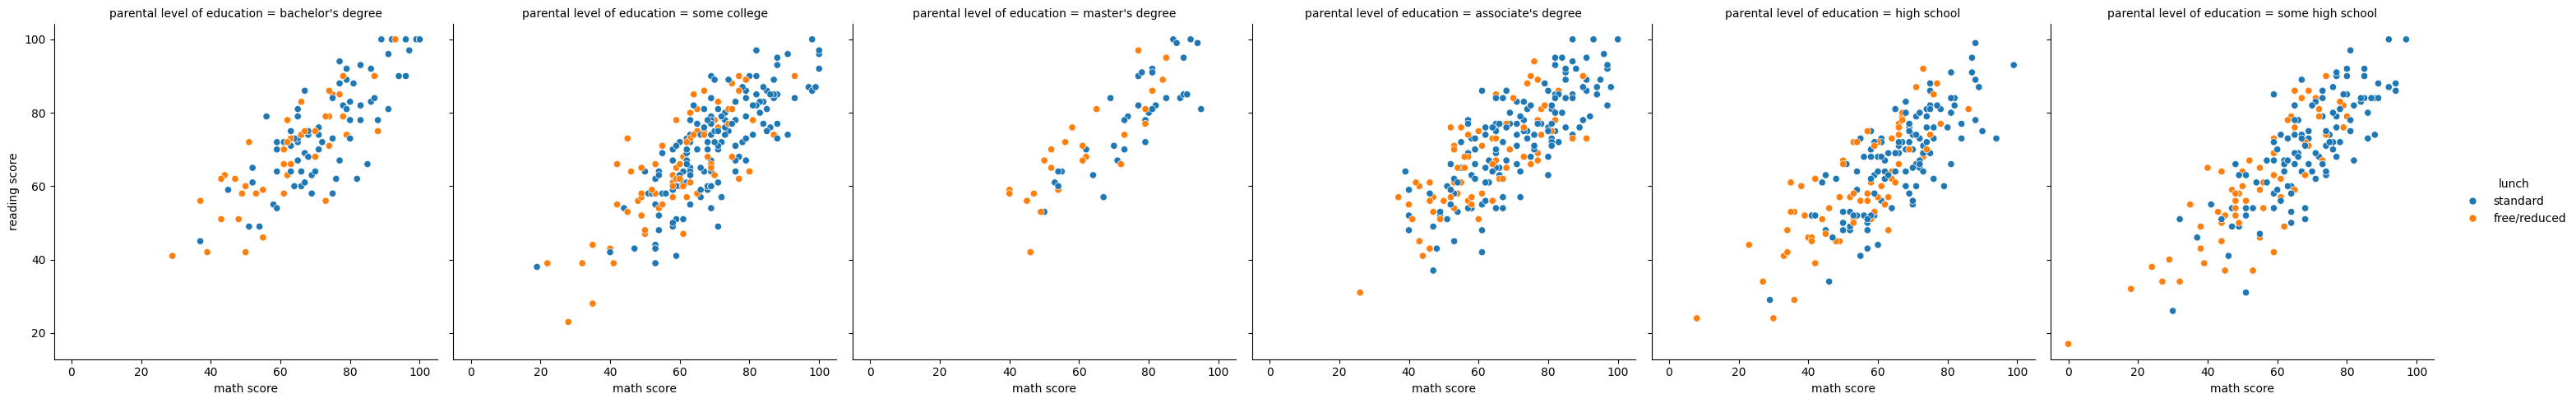

In [41]:
sns.relplot(data=df, x='math score', y='reading score', col='parental level of education', hue='lunch' )

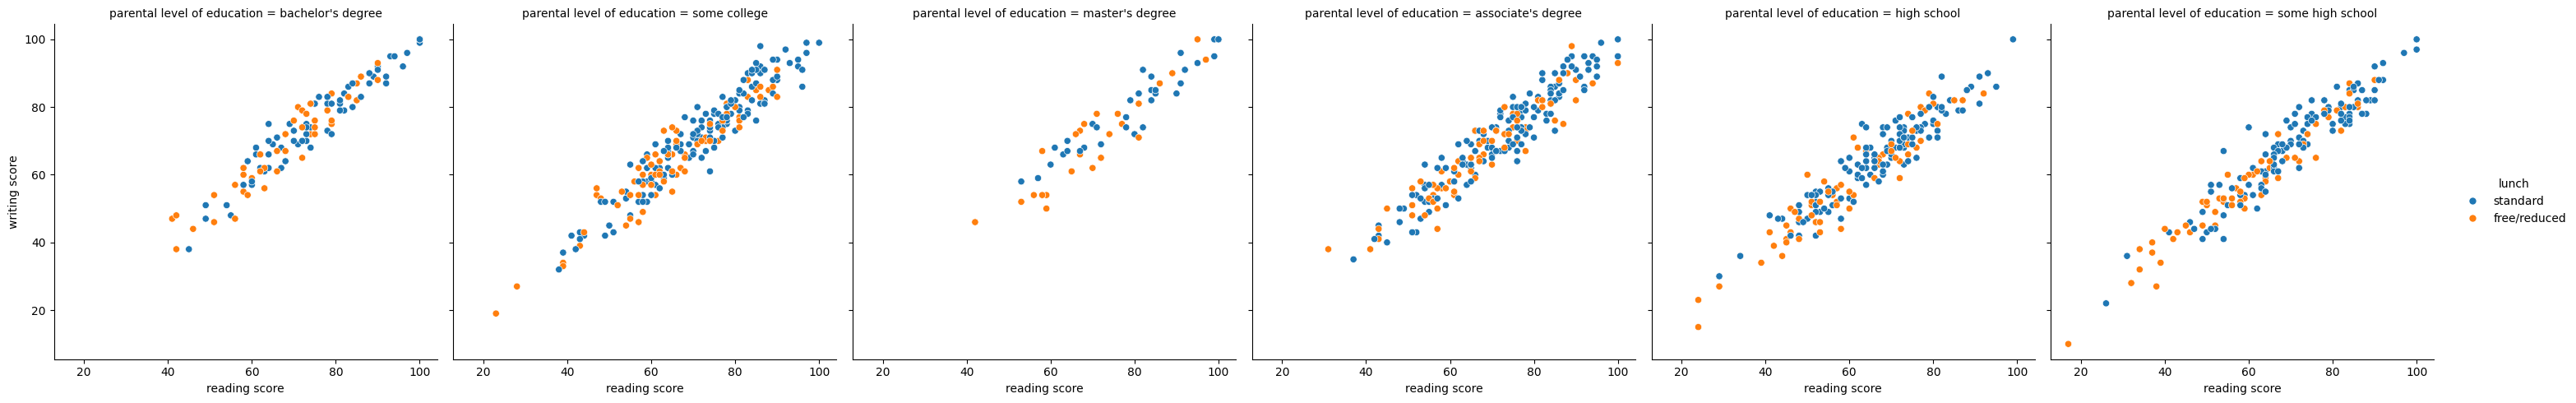

In [42]:
sns.relplot(data=df, x='reading score', y='writing score', col='parental level of education', hue='lunch' )

Наблюдения:
- Дети родителей, имеющих стпень магистра и associate не имеют результаты ниже среднего. Чуть хуже результаты показывают дети бакалавров.
- Родители всех детей, получивших низкие оценки, окончили только старшую школу, в редких случаях не окончивших колледж.
- Наивысшую оценку получали дети всех "видов" родителей.
- Дети получали льготный ланч вне зависимости от уровня образования родителей.

- Ученики, чьи родители имеют степень магистра, бакалавра или associate degree, чаще показывают результаты выше среднего.

- Самые низкие баллы встречаются у детей, чьи родители окончили только старшую школу.

- Высокие оценки возможны у детей родителей с любым уровнем образования, но вероятность низких баллов выше у тех, чьи родители не имеют высшего образования.

- Ученики с льготным ланчем встречаются во всех группах

## Оформление и кастомизация

В предыдущих разделах мы строили несколько отдельных графиков: математика vs письмо, математика vs чтение и чтение vs письмо. Теперь мы можем построить их вместе, используя `pairplot`. Также мы сможем увидеть распределения переменных на диагонали. Чтобы визуализация была более наглядной, добавим параметр `hue='gender'`.

Чтобы появилась сетка на фоне, воспользуемся `sns.set_style('darkgrid')`. Теперь все графики у нас будут с сеткой


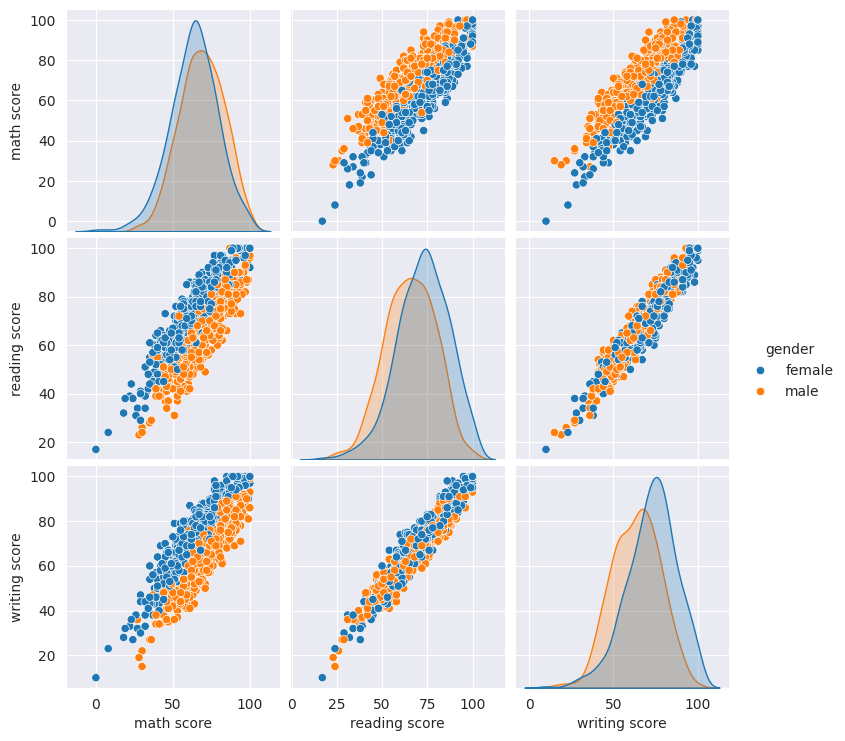

In [144]:
sns.set_style('darkgrid')

sns.pairplot(df, hue='gender')


Если вам уже поднадоело видеть оранжевые и синие точки, то можно поменять их цвет и стиль при помощи следующих параметров
- `palette = small_plalette` - изменит цвета в соответствии с вашей палитрой. Можно воспользоваться и встроенными палитрами, например `palette = 'deep'`
-  edgecolor='black' - сделает чёрную окантовку у точек
- `style = 'lunch'` - будет не только окрашивать точки из разных категорий в разные цвета, но и менять их форму

<Axes: xlabel='math score', ylabel='writing score'>

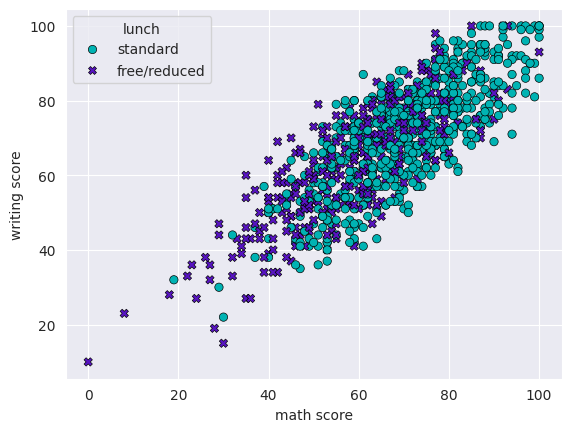

In [156]:
small_palette = ['#00b3b3', '#5714C1']
big_palette = ['#08EAAD',  '#5714C1', '#ffd93d', '#B400F5', '#049CE4', '#FF0064', '#00b3b3']
gradient_palette = ['#4be7b3', '#00b3b3', '#049CE4', '#8468be', '#d3a3f5', '#ffd93d']
fon = ['#6f91ad', '#bad9ce', '#3b5265', ]

sns.scatterplot(data = df, x= 'math score', y = 'writing score', hue='lunch', style ='lunch', palette = small_palette, edgecolor='black')


Параметр `style` может не совпадать с `hue`, тогда можно будет выделить две группы сразу на одном графике, например пол и наличие льготного ланча

<Axes: xlabel='math score', ylabel='writing score'>

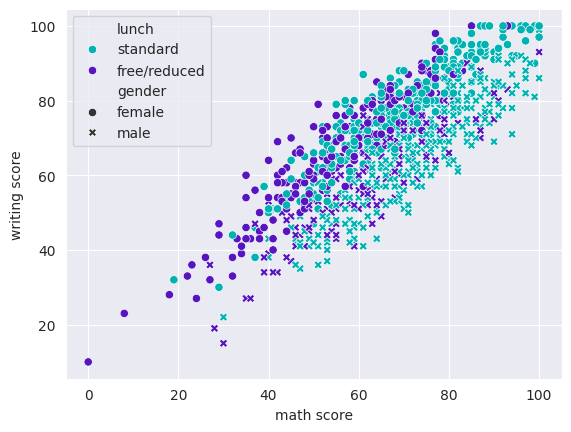

In [146]:
sns.scatterplot(data = df, x= 'math score', y = 'writing score', hue='lunch', style ='gender', palette = small_palette)


Если у нас много точек накладываются друг на друга, то мы можем уменьшить их прозрачность при помощи параметра `alpha=0.6`

/tmp/ipython-input-670593569.py:1: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.scatterplot(data = df, x= 'reading score', y = 'writing score', hue='parental level of education', style ='lunch', palette = big_palette, alpha=0.6)


<Axes: xlabel='reading score', ylabel='writing score'>

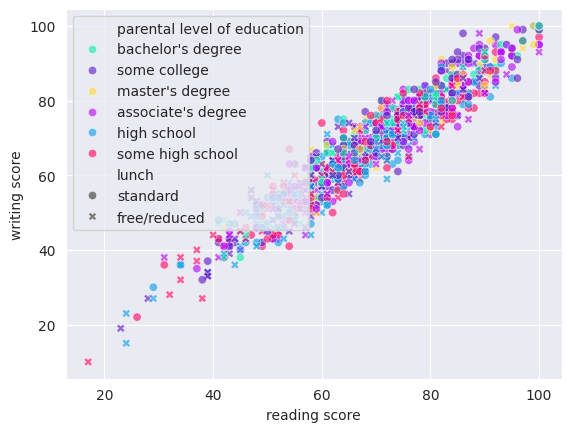

In [147]:
sns.scatterplot(data = df, x= 'reading score', y = 'writing score', hue='parental level of education', style ='lunch', palette = big_palette, alpha=0.6)

Мы можем изменить размер маркеров при помощи параметров
- `size='lunch'`
- `sizes=(50, 50)`

/tmp/ipython-input-2795775183.py:1: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.scatterplot(data = df, x= 'reading score', y = 'writing score', hue='parental level of education', style ='lunch', palette = big_palette, alpha=0.6, size='lunch', sizes=(70, 70))


<Axes: xlabel='reading score', ylabel='writing score'>

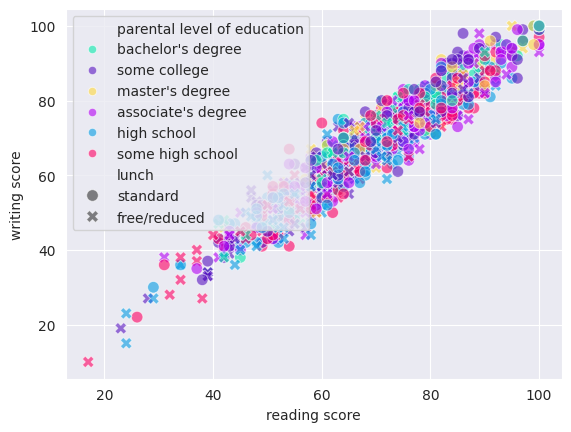

In [152]:
sns.scatterplot(data = df, x= 'reading score', y = 'writing score', hue='parental level of education', style ='lunch', palette = big_palette, alpha=0.6, size='lunch', sizes=(70, 70))

Для того, чтобы изменить цвет фона, воспользуемся методами из matplotlib

/tmp/ipython-input-1254514770.py:7: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.scatterplot(data = df, x= 'reading score', y = 'writing score', hue='parental level of education', style = 'parental level of education', palette = big_palette, ax=ax)


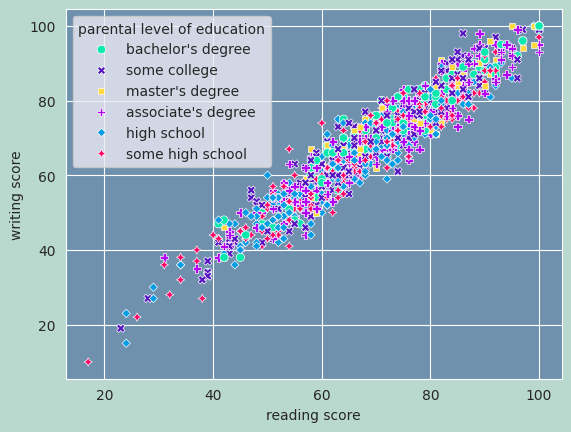

In [149]:
fig = plt.figure()
fig.patch.set_facecolor(fon[1])

ax = fig.add_subplot()
ax.patch.set_facecolor(fon[0])

sns.scatterplot(data = df, x= 'reading score', y = 'writing score', hue='parental level of education', style = 'parental level of education', palette = big_palette, ax=ax)

plt.show()

Давайте создадим график с подписями на русском языке. Для этого вновь обратимся к matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

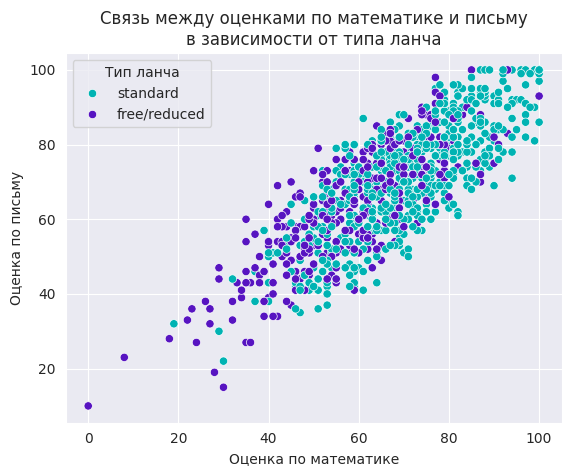

In [153]:
sns.scatterplot(data=df, x='math score', y='writing score', hue='lunch', palette = small_palette)

plt.xlabel('Оценка по математике')
plt.ylabel('Оценка по письму')
plt.legend(title = 'Тип ланча')
plt.title('Связь между оценками по математике и письму\nв зависимости от типа ланча')

plt.show

Визуализируем зависимость оценок по математике и письму у детей с разным уровнем образования родителей. Для этого создадим subplots — по одному ряду на каждый уровень образования родителей, и 3 графика в строке: по полу, по типу ланча и по прохождению подготовительного курса.

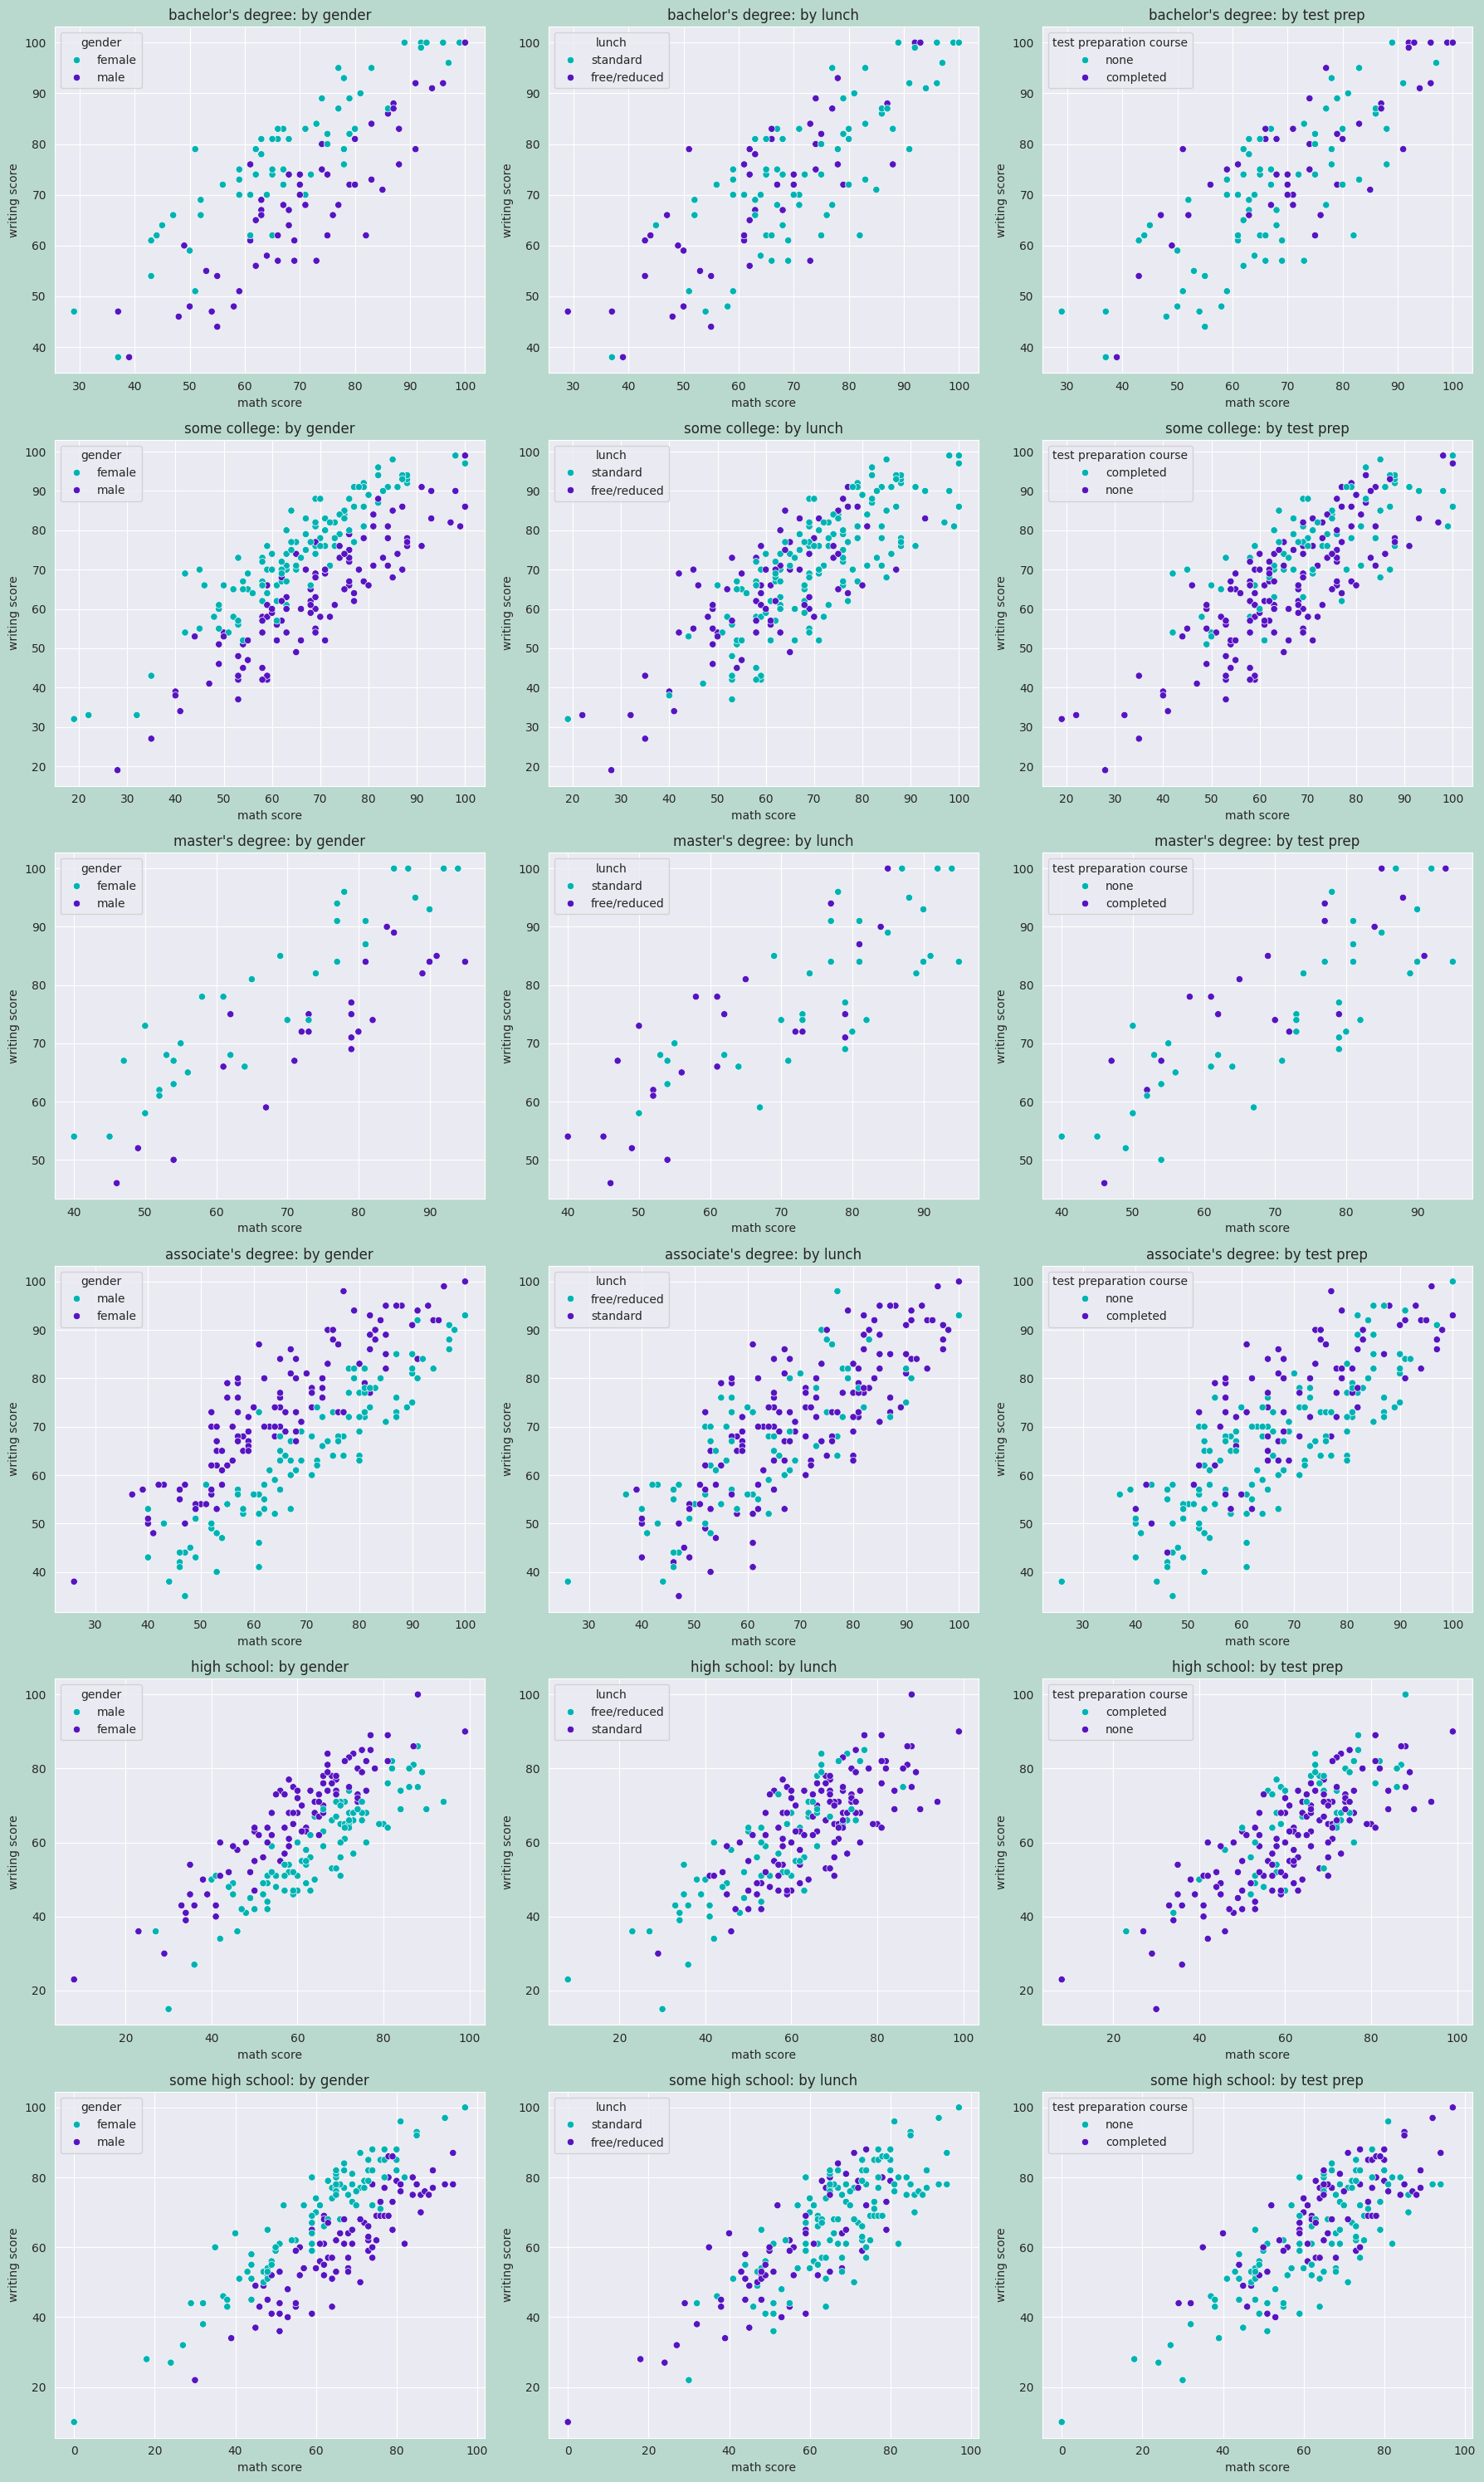

In [150]:
fig, axs = plt.subplots(6, 3, figsize=(18, 30))
fig.patch.set_facecolor(fon[1])

parental_level = df['parental level of education'].unique()

for i in range(6):
    level = df[df['parental level of education'] == parental_level[i]]

    sns.scatterplot(data=level, x='math score', y='writing score', hue='gender', palette = small_palette, ax=axs[i, 0])
    axs[i, 0].set_title(f"{parental_level[i]}: by gender")

    sns.scatterplot(data=level, x='math score', y='writing score', hue='lunch', palette = small_palette, ax=axs[i, 1])
    axs[i, 1].set_title(f"{parental_level[i]}: by lunch")

    sns.scatterplot(data=level, x='math score', y='writing score', hue='test preparation course', palette = small_palette, ax=axs[i, 2])
    axs[i, 2].set_title(f"{parental_level[i]}: by test prep")

plt.tight_layout()
plt.show()

# Итоги проекта

## Краткое описание выявленных зависимостей
В ходе анализа данных с помощью scatter plots (диаграмм рассеяния) мы выявили несколько важных закономерностей:

- Между баллами по математике, чтению и письму существует сильная положительная корреляция. Особенно сильная корреляция между баллами по письму и чтению

- Гендерные различия также заметны: девушки получают оценки по письму выше, чем по математике.

- Подготовительные курсы положительно влияют на баллы по всем предметам. Особенно заметна разница в оценках по письму.

- Уровень образования родителей имеет некоторое влияние: дети родителей с более высоким образованием не получают низких баллов, однако родители высокобальников имеют разный уровень образования.

- Тип обеда (standard vs free/reduced) также ассоциирован с результатами: учащиеся, получающие стандартный обед, демонстрируют более высокие оценки, в то время как практически все дети, поличившие очень низкие баллы, получают льготный обед.

## Рефлексия
- scatter plot — это не просто точечная диаграмма, а мощный инструмент для визуализации взаимосвязей между числовыми признаками, особенно в сочетании с параметром hue.

- Множественные scatter plots с разными подгруппами (например, с помощью subplot) позволяют сделать визуализацию более гибкой и глубокой.

- Очень важную роль играет кастомизация графиков: выбор цветов, заголовков, подписей осей и легенд позволяет повысить читаемость и сделать выводы более очевидными.

- Также стало понятно, что scatter plot — это первый шаг к более сложным визуализациям, например, кластеризации или регрессии.

